In [1]:
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

pathmoudules = '/mnt/c/texlive/2019/bin/win32'
if pathmoudules not in sys.path:
    sys.path.append(pathmoudules)
#import calculos as solver
import SolverPL as solver
from IPython.display import display, Math

q = 1.602176e-19 #C
kb = 1.3806504e-23 #J/K
nii = 0.0
hbar = 1.054588757e-34
m_e= 9.1093826E-31 #kg
pi=np.pi
eps0= 8.8541878176e-12 #F/m
J2meV=1e3/q
from thomas_solve  import TDMA
#matplotlib options
plt.rcParams['font.family']         = 'Times New Roman'
#plt.rcParams['font.serif']          = 'Times'
plt.rcParams['xtick.labelsize']     = 17
plt.rcParams['ytick.labelsize']     = 17
plt.rcParams['axes.linewidth']      = 2
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  2
plt.rcParams["xtick.minor.width"]   =  2
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  2
plt.rcParams["ytick.minor.width"]   =  2
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False

import platform
if platform.system() == 'Linux':
    newpath = os.getcwd() + '/DATA'
    
elif  platform.system() == 'Windows':
    newpath = os.getcwd() + '\\DATA'
    
if not os.path.exists(newpath):
    os.makedirs(newpath)





mpl.rcParams['font.size'] = 13


In [6]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastructure

# TEMPERATURE
s4.T = 12 #Kelvin
s4.Binding = 5e-3
#s0.scheme = 


s4.Emin = 1.52
s4.Emax = 1.55
s4.delta = 0.1e-3
# Total subband number to be calculated for electrons
s4.subbands = 1
# APPLIED ELECTRIC FIELD
s4.Fapp = 0e6 # (V/m)

# For 1D, z-axis is choosen
s4.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(structure4) #

sol4 = solver.Schrodinger(model4,sparse = True,absolute =True)

TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')


Total layer number: 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

CPU times: user 672 ms, sys: 1.39 s, total: 2.06 s
Wall time: 362 ms


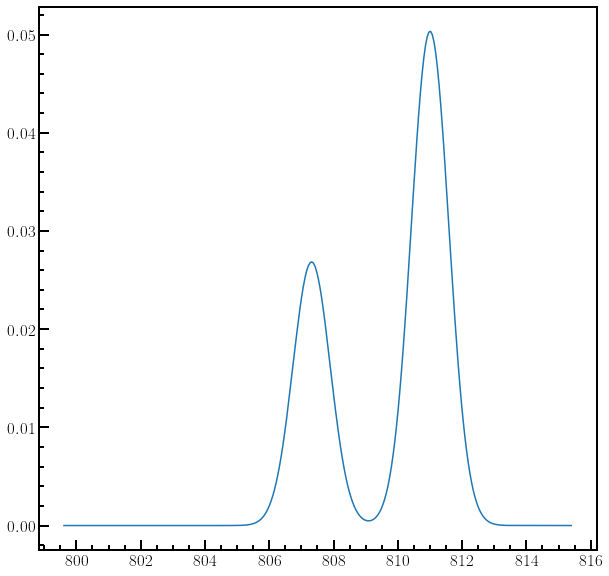

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(1239.4/sol4.evec,sol4.PL)

In [51]:
1239.4/1.5284

810.9133734624445